# Perceptrón

En las redes neuronales, los pesos pueden interpretarse como la fuerza de las conexiones que unen dos neuronas entre sí. De esta forma, los pesos de la red neurona determinan cómo se comportará ésta cuando reciba un vector de entrada: de los pesos depende la clase a la que pertenecerá el ejemplo de entrada.

Sin duda, cuanto más compleja sea la red, más compleja será la interpretación de las interacciones de las neuronas a través de los pesos. Aquí presentamos un ejemplo simple: el perceptrón. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

## Preparación de los datos

Una parte immportante de toda red neuronal son los datos con los que va a entrenarse. Estos datos le ayudarán a ajustar sus parámetros (pesos) y, de esta forma, crear una función capaz de generalizar la tarea que ha aprendido.

Los datos pueden verse como vectores aleatorios; es decir, como vectores cuyas entradas son variables aleatorias. Así, un vector aleatorio se ve como:

$$X^T = [X_1, X_2, ..., X_n]$$

donde $X_i$, para toda $i=1,...,n$, es una variable aleatoria. Cuando muestreamos los ejemplos, esperamos que estos sean iid (idependientes e idénticamente distribuidos); esto implica que cada vector ejemplo $X$ no depende de ningún otro ejemplo en el dataset. Nuestro objetivo, entonces es determinar el valor que una variable $Y$ puede tomar dado que conocemos el vector $X$. Este problema se puede plantear como:

$$\hat{y} = \arg\max_y p(Y=y|X_1,X_2,...,X_n)$$

Para probar el método de regresión logística, usamos un dataset sobre cáncer de mama que se puede enonctrar en la paquetería de sklearn. Este dataset define un problema de clasificación binario entre la clases es cáncer (1) y no es cáncer (0). El dataset cuenta con diferentes mediciones sobre los tumores. En la descripción del dataset se detalla más sobre estos.

In [2]:
#Carga los datos obtenidos
data = load_breast_cancer()
X = data.data
Y = data.target

pd_data = pd.DataFrame(X, columns=data.feature_names)
pd_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Como es común en los datasets, procederemos a separar los datos en entrenamiento y evaluación usando un esquema 70-30; esto es, 70\% para el entrenamiento y 30\% para la evaluación. 

In [3]:
#Separación de los datos
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

print('Tamaño entrenamiento: {}\nTamaño evaluación: {}'.format(len(x_train), len(x_test)))

Tamaño entrenamiento: 398
Tamaño evaluación: 171


#### Visualización de los ejemplos

En su calidad de vecotres, podemos visualizar cómo se comportan en un espacio vectorial. Para esto, utilizamos una técnica de reducción de dimensionadlida, PCA. Si bien los vectores no parecen linealmente separables, se verá al aplicar el perceptrón que, en su espacio oroginial, existe un hiperplano capaz de separar estos datos. Esto depende en gran medida de la selección de las variables aleatorias que definen los ejemplos.

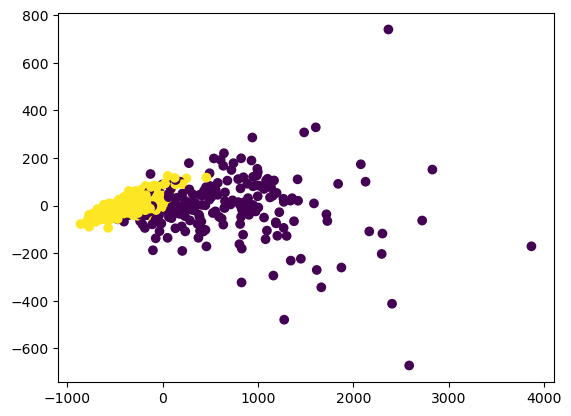

In [4]:
RedX = PCA(2).fit_transform(X)
plt.scatter(RedX[:,0], RedX[:,1], c=Y)
plt.show()

## Aplicación del algoritmo del perceptrón

El perceptrón es un algoritmo de aprendizaje estadístico que busca estimar las clases de un conjunto de datos a partir de la función de decisión:

$$f(x; \theta) = \begin{cases} 1 & \text{ si } wx + b > 0 \\ 0 & \text{ si } wx + b \leq 0\end{cases}$$

Aquí $x$ es un vector de entrada. La función f depende de $\theta = {w,b}$ que representa los parámetros o los pesos de la red: $w$ contienen los pesos de las conexiones y $b$ es el bias. Definimos esta función a continuación:

In [5]:
#Función de decisión
f = lambda a: (a >= 0).astype(np.int64)

#### Algoritmo del perceptrón

El objetivo del algoritmo del perceptrón es obtener los parámetros $\theta$ adecuados para que la red pueda clasificar adecuadamente los ejemplos. Este algoritmo es iterativo y busca minimizar el cuánto se equivoca la red en cada paso. 

Antes de entrar de lleno al este algoritmo, agregaremos una columna más a la matriz de datos de entrenamiento; esto con el objetivo de que esta columna represente el bias, de tal forma que sólo actualicemos sobre un vector de parámetros:

Para inicializar el algoritmo del perceptron, tomaremos un vector $w \in \mathbb{R}^{n+1}$, donde $n$ es el número de variables (la dimensión de los vectores ejemplos) y el $+1$ responde al bias. Asimismo, estableceremos un número máximo de iteraciones (en caso de que el algoritmo no sea capaz de minimizar el error) y, finalmente, estableceremos un rango de aprendizaje.

Para entrenar la red, utilizaremos el algoritmo del perceptrón. Este consta de dos partes:

* Forward. Para cada ejemplo $x$, se computará la función $f(x; \theta)$
* Backward. Se actualizarán los pesos de $\theta = {w,b}$ por medio de la regla: $$w_i \leftarrow w_i - \eta (f(x;\theta)-y_x)x_i$$ Donde $y_x$ es la clase a la que pertenence el ejemplo $x$.

El algoritmo iterará hasta que el error $f(x; \theta) -y$ sea 0 o cuando se cumpla el número máximo de iteraciones.

In [6]:
class Perceptron():
    """Clase para modelo del perceptrón"""
    def __init__(self, lr=0.1):
        self.lr = lr
        self.w = None
        self.b = 1
        
    def fit(self, x,y, max_its=100):
        """Entrenamiento del modelo"""
        #Tamaño de los datos
        m,d = x.shape
        #Incializa theta
        self.w = np.random.rand(d)/np.sqrt(d)
        
        stop = False
        t = 0
        while  stop == False:
            #Revisamos cada uno de los ejemplos
            err_it = 0
            for x_i, y_i in zip(x,y):
                #Calculamos función logística
                out = f(np.dot(self.w,x_i)+self.b)
                #Actualizamos los parámetros
                self.w = self.w - self.lr*(out-y_i)*x_i
                self.b = self.b - self.lr*(out-y_i)
                #Acumula error
                err_it += out-y_i

            t += 1
            #Criterio de paro
            if err_it == 0 or t > max_its: 
                stop = True
                
        #Guarda los parámetros aprendidos
        #self.w = w[:-1]
        #self.b = w[-1]
                
    def predict(self,x):
        """Predicción de clases"""
        #Predicción de la clase
        y_pred = f( np.dot(x, self.w) + self.b )
                
        return y_pred

### Entrenamiento del modelo

Procedemos a definir el modelo y entrenarlo con los datos de entrenamiento, en este caso, lo que el modelo aprenderá son los pesos $\theta = (w,b)$ que definen al perceptrón. Debemos especificar el rango de aprendizaje y el número máximo de iteraciones. Aunque el algoritmo puede detenerse antes si el error de clasificación es igual a 0.

In [7]:
#Genera el modelo
model = Perceptron(lr=1e-5)
#Entrena el modelo
model.fit(x_train, y_train, max_its=100)

### Evaluación del modelo

Finalmente, podemos evaluar el modelo y determinar la calidad del aprendizaje del perceprón. Para esto usamos las métricas usuales que se encuentran implementadas en la función <tt>classification_report</tt> de la paquetería <tt>sklearn</tt>.

In [8]:
#Obtiene clases
y_pred = model.predict(x_test)
#Crea reporte de clasificación
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       1.00      0.77      0.87        62
           1       0.89      1.00      0.94       109

    accuracy                           0.92       171
   macro avg       0.94      0.89      0.91       171
weighted avg       0.93      0.92      0.92       171



#### Exploración de la red

El perceptrón es un algoritmo que, por su simplicidad, es fácilmente interpretable. Dado que los ejemplos positivos (aquellos que sí son gatos) tienen que ser mayores a 0, mientras que los negativos serán menores a 0, el algoritmo otorga a las variables que influyen más en una desición positiva valores negativos; es decir, las conexiones que ayudan a discriminar si el vector de entrada describe un gato son conexiones fuertes (positivas), mientras que las que influyen negativamente tendrás conexiones negativas. Podemos observar entonces que peso se asigna en la red a cada variable.

In [9]:
#DataFrame de los parámetros
beliefs = pd.DataFrame(data=np.append(model.w,model.b),index=list(data.feature_names)+[' $\theta_0$'],columns=[' $\theta_i$'])

beliefs

,$\theta_i$
mean radius,0.131808
mean texture,-0.034059
mean perimeter,0.185623
mean area,0.041049
mean smoothness,0.167542
mean compactness,0.053338
mean concavity,-0.000988
mean concave points,0.014479
mean symmetry,0.133501
mean fractal dimension,0.030847


Las variables con valores positivos más altos tendrán una influencia mayor en determinar la clase 1 (cáncer), mientras que los elementos con valores negativos tendrán menos influencia para esta clase y mayor para la clase 0 (no cáncer).

### Relación del perceptrón con regresión logística

Los parámetros aprendidos en el perceptrón y en la regresión logística están relacionados, pues como podemos ver, la regresión logística se basa en la función logística, que determina la probabilidad $p(Y=1|x)$ de la siguiente forma:

$$\sigma(a) = \frac{1}{1+e^{-a}}$$

La cual es 0.5 cuando $a=0$, pero si $a < 0$ entonces el valor de la función (probabilidad) será menor a 0.5; por su parte si $a > 0$, entonces la función será mayor a 0.5. En cualquier caso, podemos tomar la decisión en base a la función logísitica comoa:

$$f_\sigma(x; \theta) = \begin{cases} 1 & \text{ si } \sigma(wx + b) > 0.5 \\ 0 & \text{ si } \sigma(wx + b)\leq 0.5\end{cases}$$

In [10]:
#Función sigmoide
sig = lambda x: 1./(1.+np.exp(-x))

Sin embargo, notamos que en el perceptrón nos saltamos la fase de calcular un valor de probabilidad y decide en base a si el valor $wx +b$ es mayor o menor a 0. Pero podemos concluir que los valores de los parámetros tanto para el perceptrón y la regresión logística tomarán las mismas decisiones en la clasificación. Por tanto, mediante el modelo del perceptrón, si bien modelo de clasificación, también podemos estimar probabulidades de las clases.

Finalmente, podemos ver las prbabilidades para cada ejemplo:

In [11]:
pd_data = pd.DataFrame(data = y_pred)
pd_data['Prob. clase 1'] = sig(np.dot(x_test,model.w)+model.b)
pd_data['Prob. clase 0'] = 1-sig(np.dot(x_test,model.w)+model.b)
pd_data['Clase real'] = y_test
pd_data[['Prob. clase 1','Prob. clase 0','Clase real']]

,Prob. clase 1,Prob. clase 0,Clase real
0,0.998891,0.001109,1
1,0.648456,0.351544,0
2,0.999997,0.000003,1
3,0.982717,0.017283,0
4,0.400086,0.599914,0
...,...,...,...
166,0.999997,0.000003,1
167,0.999995,0.000005,1
168,0.999996,0.000004,1
169,0.999996,0.000004,1
